**Author**: Shirley(Xinyue) Gui, Wen Zhan

# Introduction


Exploratory Data Analysis (EDA) is vital in many data science related projects. Identifying trends and patterns in datasets is an initial and crucial step before building machine learning models, since it helps us better understand the data. In this blog, you will find some of the most frequently used graphs and plots, with summary of their use-cases and example codes (language used in Python). The goal of this blog is to help you quickly identify which plot could best satisfy your needs, helping you save time in the EDA procedure.


# 1. Visuialize Distribution

## a. Boxplot

**Use-case**: visualize the distribution of quantitative values in a field; valuable for comparisons across different categorical variables 

**Advantage:** display outliers; visualize a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”); good to represent variability

**Disadvantage**: Hides the multimodality and other features of distributions


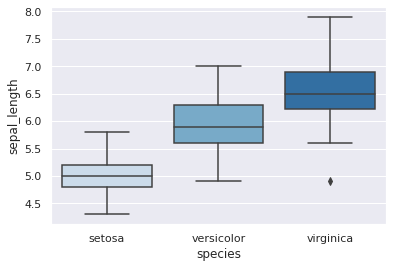

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.boxplot(x=df["species"], y=df["sepal_length"], palette="Blues")
plt.show()

[link to adjust Parameters (seaborn.boxplot)](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

## b. Histogram

**Use-case**: summarise discrete or continuous data that are measured on an interval scale.

**Advantage**: can be applied to both continuous and discrete data; can explicitly show skewness 

**Disadvantage**: not allow you to read exact values because data is grouped into categories; it is not easy to compare two data sets


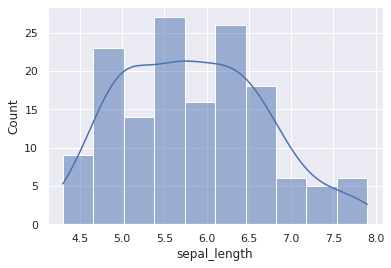

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(data=df, x="sepal_length", kde=True, bins = 10)
plt.show()

[link to adjust Parameters (seaborn.histplot)](https://seaborn.pydata.org/generated/seaborn.histplot.html)

## c. Violin

**Use-case**: similar to box plots, violin plots also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

**Advantage**: aside from showing the abovementioned statistics, it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak

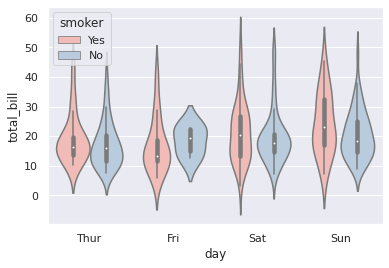

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('tips')
 
# Grouped violinplot
sns.violinplot(x="day", y="total_bill", hue="smoker", data=df, palette="Pastel1")
plt.show()

[link to adjust Parameters (seaborn.violinplot)](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

# 2. Find Relationships Among Variables

## a. Scatter plot


**Use-case**: It shows the relationship between two variables. It is the best method to show you a non-linear pattern.

**Advantage**: a straightforward visualization of relationship between two variables; easy to tell non-linearity

**Disadvantage**: A scatter diagram does not show you the quantitative measurement of the relationship between the variables. It only shows the quantitative expression of quantitative change. This chart does not show you the relationship for more than two variables.

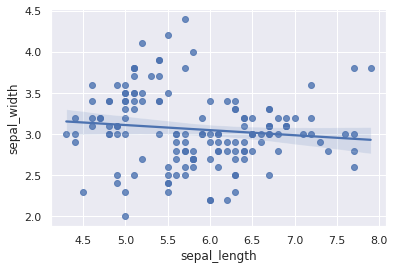

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# use the function regplot to make a scatterplot
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])
 
# make a scatterplot without regression fit
#ax = sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False)

plt.show()

[link to adjust Parameters (seaborn.scatterplot)](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

## b. Correlation Heatmap


**Use-case**: a graphical representation of correlation matrix representing correlation between different variables; helpful to identify and compare the relationship among variables

**Advantage**: it is fairly straightforward, since each feature is listed on both axis, and their relationships with other variables are displayed using color. 

**Disadvantage**: Since heatmaps are a graphic, it will become more crowded as the amount of variables increase.

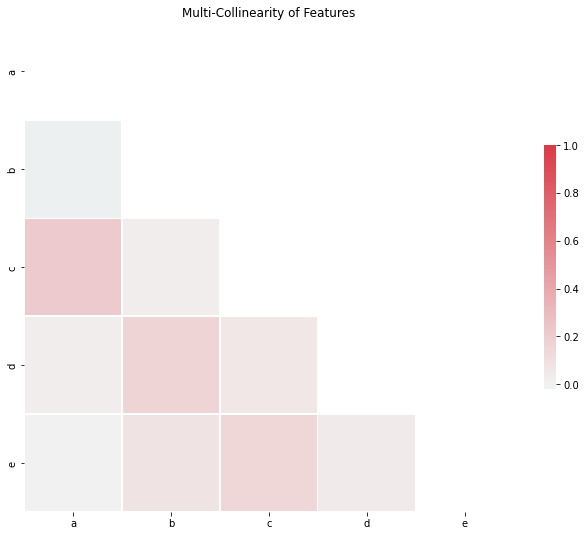

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
 
# Create a dataset
df = pd.DataFrame(np.random.random((100,5)), columns=["a","b","c","d","e"])

# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask

f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr_matrix,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
plt.show()

[link to adjust Parameters (seaborn.heatmap)](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# 3. Comparison



## a. Barplot

**Use-case**: Bar Plot is the commonest and the most popular method to reveal the relationship between a numeric and a categorical variable. One bar represents an entity of the categorical variable and the height of the bar showcases its numeric value. 

**Advantage**: It allows audiences to easily scan the plot for valuable insights about comparison between several different categories of data.



### ① Basic barplot

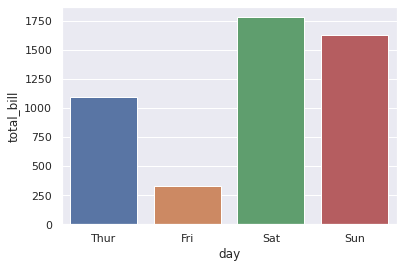

In [ ]:
import seaborn as sns

# load dataset and set style of plot background
tips = sns.load_dataset("tips")
sns.set(style="darkgrid")

sns.barplot(
    y="total_bill", 
    x="day",  # swap x & y can yields horizontal version rather than vertival version
    data=tips, 
    estimator=sum,  # Statistical function to estimate, default is 'mean' 
    ci=None  # confidence interval, set 'sd' to draw standard deviation
);


### ② Grouped barplot

**Used to consider data with groups and subgroups**

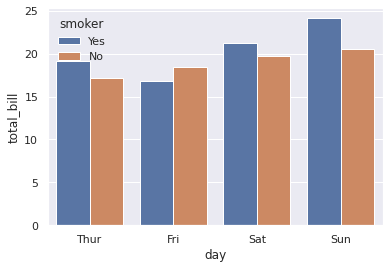

In [ ]:
import seaborn as sns

# load dataset and set style of plot background
tips = sns.load_dataset("tips")
sns.set(style="darkgrid")

sns.barplot(x="day", y="total_bill", data=tips, ci=None, 
            hue="smoker"  # add the subgroup dimension performed by color
           );


### ③ Stacked barplot

**Subgroups displayed on top of each other**

Plotted by 2 overlapped barplots and a legend

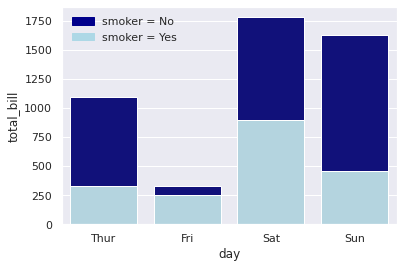

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset and set style of plot background
tips = sns.load_dataset("tips")
sns.set(style="darkgrid")

# bar chart 1 -> display total data 
bar1 = sns.barplot(x="day",  y="total_bill", data=tips, color='darkblue', estimator=sum, ci=None)

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes') 
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')
# covers part of bars with different color and left top for the other group

# add legend by matplotlib
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()


## b. Parallel coordinate plot

**Use-case**: It is used to compare different the feature of observatins on numeric variables.

**Advantage**: Sometimes the feature can be distribution and it allows comparison on not only one but also a set of numeric variables.

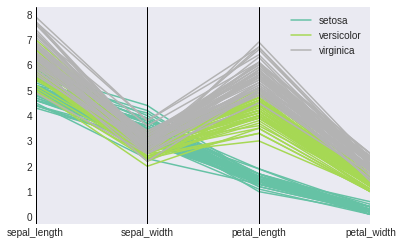

In [ ]:
import pandas
from pandas.plotting import parallel_coordinates

# load dataset
import seaborn as sns
data = sns.load_dataset('iris')

parallel_coordinates(
    frame=data,
    class_column='species',  # column name containing class names
    colormap='Set2'  # for different line colors (str or matplotlib colormap)
)

plt.show()


## c. Lollipop plot

**Use-case**: It could be a substitute for barplot and also looks like Cleveland dot plot in our lectures.

**Interesting experiment**: Barplot vs. Lollipop plot vs. Dot plot: 
https://3iap.com/bar-graphs-vs-lollipop-charts-vs-dot-plots-experiment-PP8-qapwQe2fRBJu1-ADfA/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


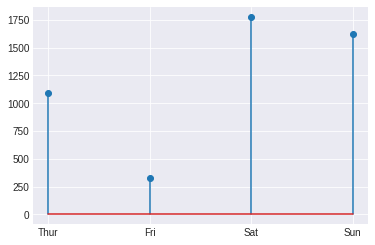

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


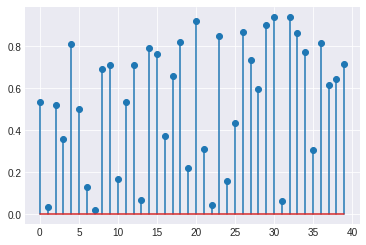

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# load same data as Barplot
tips = sns.load_dataset("tips")
total = tips.groupby('day')['total_bill'].sum().reset_index()

plt.stem(total['day'], total['total_bill'])
plt.show()

# create random data
values = np.random.uniform(size=40)
 
plt.stem(values)  # if x is not provided, a sequence of numbers is created by python
plt.show()


**Tips**: Lollipop plot may have aesthetic significance when dealing with bigger number of categorical variables due to the extra white space. 

# 4. Time series



## a. Line chart

**Use-case**: It is a basic chart which displays the variation of one or several numeric variables, usually with time series. 

**Advantage**: Line chart visualizes the evolution or trend directly.

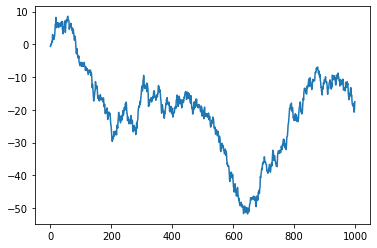

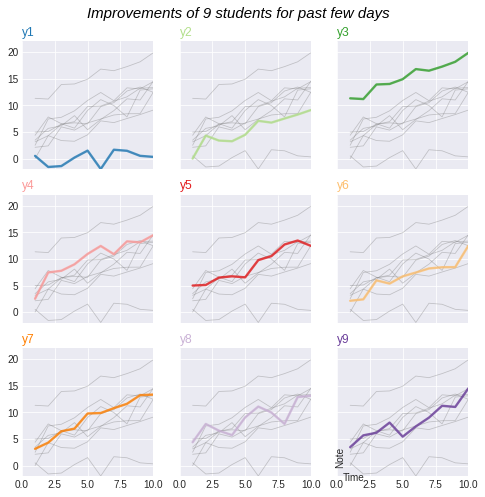

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# basic sample
# create data
values=np.cumsum(np.random.randn(1000,1))

plt.plot(values)
plt.show()

# with multiple groups
# make a data frame with 9 groups
df=pd.DataFrame({'x': range(1,11), 
                 'y1': np.random.randn(10), 
                 'y2': np.random.randn(10)+range(1,11), 
                 'y3': np.random.randn(10)+range(11,21), 
                 'y4': np.random.randn(10)+range(6,16), 
                 'y5': np.random.randn(10)+range(4,14),
                 'y6': np.random.randn(10)+range(2,12), 
                 'y7': np.random.randn(10)+range(5,15), 
                 'y8': np.random.randn(10)+range(4,14), 
                 'y9': np.random.randn(10)+range(4,14)})
 
# initialize the figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8, 8)) 

# create a color palette
palette = plt.get_cmap('Paired')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every group, but discrete
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='', color='grey', linewidth=0.8, alpha=0.4)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.8, label=column)
 
    # Same limits for every chart
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    if num in range(7):
        plt.tick_params(labelbottom=False)
    if num not in [1, 4, 7]:
        plt.tick_params(labelleft=False)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("Improvements of 9 students for past few days", 
             fontsize=15, fontweight=0, 
             color='black', style='italic', 
             y=0.94)
 
# Axis titles
plt.text(1.3, -2.3, 'Time', ha='center', va='center')
plt.text(0.2, 1.6, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()


## b. Area chart

**Use-case**: It is similiar to Line chart except that the area between the x axis and the line is filled in with color or shading.

**Advantage**: When using stacked version, it allows ro read the evolution of total and also the change of distrebution. 

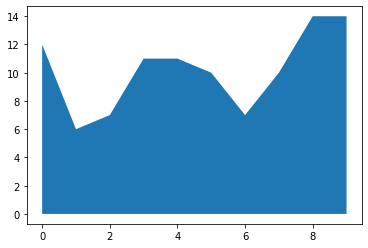

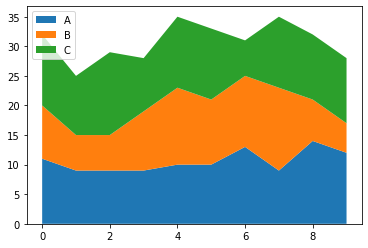

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# basic sample
# create data
x = range(10)
y = np.random.randint(5, 15, 10)

plt.fill_between(x, y)
plt.show()

# stacked version for data with subgroups
# Create data
x = range(10)
y1 = np.random.randint(5, 15, 10)
y2 = np.random.randint(5, 15, 10)
y3 = np.random.randint(5, 15, 10)

plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')

plt.show()


# 5. Parts & Whole



## a. Pie chart
**Use-case**: A circle devide into sections that each represents a part of the whole. 

**Feature**: It is very easy to understand so that it is one of the most common. However, it is also really hard to quantify by reading it.

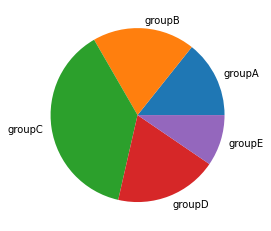

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create data
names=['groupA', 'groupB', 'groupC', 'groupD', 'groupE']
values = np.random.randint(0, 10, 5)

plt.pie(values, labels=names, labeldistance=1.1);
plt.show()


## b. Venn diagram
**Use-case**: It showcases the logical relationships between a finite collection of different sets. 

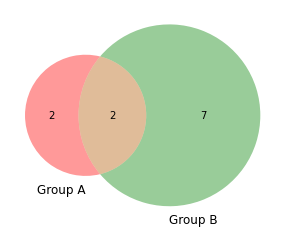

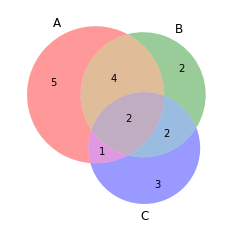

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import numpy as np

# 2 groups
venn2(subsets=np.random.randint(1, 15, 3), 
      set_labels=['Group A', 'Group B'])
plt.show()

# 3 groups
venn3(subsets=np.random.randint(1, 10, 10))
plt.show()


# References

some example codes: https://www.python-graph-gallery.com/

https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

https://pmstudycircle.com/what-is-a-scatter-diagram-correlation-chart/

https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/#What_is_Correlation_Heatmap

https://medium.com/@connor.anderson_42477/hot-or-not-heatmaps-and-correlation-matrix-plots-940088fa2806

https://www.guru99.com/histogram-vs-bar-chart.html